In [26]:
import pandas as pd
DIR ="/Volumes/Lab/covid19-AnalyticsHbub/India/data/"

In [27]:
#df1 = tb.read_pdf('https://www.mohfw.gov.in/pdf/DistrictWiseList324.pdf', multiple_tables=True, pages='all',output_format='dataframe')[0]

In [28]:
icmr_df = pd.read_csv(DIR+'icmr_test_india.csv')
#icmr_df['date'] = pd.to_datetime(icmr_df['date']).dt.date

In [39]:
icmr_df

,date,sample,confirmed,ratio
0,13-03-2020,6500,78,1
1,18-03-2020,13125,150,1
2,19-03-2020,14175,182,1
3,20-03-2020,14376,206,1
4,20-03-2020,15404,236,2
5,21-03-2020,16911,315,2
6,22-03-2020,18127,396,2
7,23-03-2020,20707,471,2
8,24-03-2020,20864,482,2
9,25-03-2020,25144,581,2


In [40]:
pd.to_datetime(icmr_df.date, format='%d-%m-%Y')

0    2020-03-13
1    2020-03-18
2    2020-03-19
3    2020-03-20
4    2020-03-20
5    2020-03-21
6    2020-03-22
7    2020-03-23
8    2020-03-24
9    2020-03-25
10   2020-03-27
11   2020-04-01
12   2020-04-02
13   2020-04-03
Name: date, dtype: datetime64[ns]

In [22]:
icmr_df.to_dict(orient='records')

[{'date': datetime.date(1970, 1, 1),
  'sample': 6500,
  'confirmed': 78,
  'ratio': 1},
 {'date': datetime.date(1970, 1, 1),
  'sample': 13125,
  'confirmed': 150,
  'ratio': 1},
 {'date': datetime.date(1970, 1, 1),
  'sample': 14175,
  'confirmed': 182,
  'ratio': 1},
 {'date': datetime.date(1970, 1, 1),
  'sample': 14376,
  'confirmed': 206,
  'ratio': 1},
 {'date': datetime.date(1970, 1, 1),
  'sample': 15404,
  'confirmed': 236,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 16911,
  'confirmed': 315,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 18127,
  'confirmed': 396,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 20707,
  'confirmed': 471,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 20864,
  'confirmed': 482,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 25144,
  'confirmed': 581,
  'ratio': 2},
 {'date': datetime.date(1970, 1, 1),
  'sample': 27688,
  'confirmed': 691,
  'ratio': 2},
 

In [49]:
import requests
import numpy as np
import datetime

In [176]:
API_URL = 'https://api.covid19india.org/raw_data.json'
DIR ="/Volumes/Lab/covid19-AnalyticsHbub/India/data/"

def load_covid19in_org(api_url, dir_):
    RAW_D = requests.get(api_url)
    raw_data = RAW_D.json()
    raw_df = pd.json_normalize(raw_data, 'raw_data')
    raw_df.replace(r'^\s*$', np.nan, regex=True, inplace=True) #Replace Blank with NaN for pandas operation
    raw_df = raw_df[raw_df.count(1) >5 ]
    raw_df.nationality.fillna("India",inplace=True)
    raw_df.notes.fillna("no notest", inplace=True)
    raw_df['gender'] = raw_df.gender.replace({"M": "Male","F": "Female"}).fillna("Not Available")
    raw_df.statuschangedate.fillna(raw_df.dateannounced,inplace=True) # replace status date nan value with dignosed date
    raw_df.agebracket.replace({'28-35':'32'}, inplace=True) # Fill Age 
    raw_df['agebracket'] = raw_df.agebracket.fillna(-1).astype(int)
    raw_df['dateannounced'] = pd.to_datetime(raw_df['dateannounced']).dt.date
    raw_df['statuschangedate'] = pd.to_datetime(raw_df['statuschangedate']).dt.date
    raw_df = raw_df.fillna('Not Available')
    fname = datetime.datetime.now().strftime("%Y-%m-%d")
    raw_df.to_csv(dir_+'/covid19org/raw_'+fname+'.csv')
    return raw_df

In [177]:
df = load_covid19in_org(API_URL, DIR)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3482 entries, 0 to 3481
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   agebracket                           3482 non-null   int64 
 1   backupnotes                          3482 non-null   object
 2   contractedfromwhichpatientsuspected  3482 non-null   object
 3   currentstatus                        3482 non-null   object
 4   dateannounced                        3482 non-null   object
 5   detectedcity                         3482 non-null   object
 6   detecteddistrict                     3482 non-null   object
 7   detectedstate                        3482 non-null   object
 8   estimatedonsetdate                   3482 non-null   object
 9   gender                               3482 non-null   object
 10  nationality                          3482 non-null   object
 11  notes                                3482 n

In [190]:
pd.to_datetime(df['dateannounced'])

0      2020-01-30
1      2020-02-02
2      2020-03-02
3      2020-02-03
4      2020-02-03
          ...    
3477   2020-04-04
3478   2020-04-04
3479   2020-04-04
3480   2020-04-04
3481   2020-04-04
Name: dateannounced, Length: 3482, dtype: datetime64[ns]

In [60]:
import requests
import numpy as np

## Global Cases

In [62]:
json_url = 'https://pomber.github.io/covid19/timeseries.json'
COVID19 = requests.get(json_url)
COVID19 = COVID19.json()

In [64]:
pd.json_normalize(COVID19, )

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi
0,"[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...",...,"[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths...","[{'date': '2020-1-22', 'confirmed': 0, 'deaths..."


In [66]:
COVID19.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'K

In [75]:

pd.json_normalize(COVID19, 'Afghanistan')

,date,confirmed,deaths,recovered
0,2020-1-22,0,0,0
1,2020-1-23,0,0,0
2,2020-1-24,0,0,0
3,2020-1-25,0,0,0
4,2020-1-26,0,0,0
...,...,...,...,...
68,2020-3-30,170,4,2
69,2020-3-31,174,4,5
70,2020-4-1,237,4,5
71,2020-4-2,273,6,10


In [83]:
pd.json_normalize(COVID19, 'Afghanistan')

,date,confirmed,deaths,recovered
0,2020-1-22,0,0,0
1,2020-1-23,0,0,0
2,2020-1-24,0,0,0
3,2020-1-25,0,0,0
4,2020-1-26,0,0,0
...,...,...,...,...
68,2020-3-30,170,4,2
69,2020-3-31,174,4,5
70,2020-4-1,237,4,5
71,2020-4-2,273,6,10


In [86]:
list(COVID19.keys())[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [96]:
for key in list(COVID19.keys())[:2]:
    dataset = pd.json_normalize(COVID19, key)
    dataset['country'] = key
    df.append(dataset)

In [98]:
dataset = pd.json_normalize(COVID19, 'India')

In [91]:
dataset['country'] = 'India'

In [165]:
def load_covid_json(json_f):
    append_covid = []
    for key in json_f.keys():
        data = pd.json_normalize(json_f, key)
        data['country'] = key
        data['recovery_rate'] = (data.recovered/data.confirmed).fillna(0)
        data['deaths_rate'] = (data.deaths/data.confirmed).fillna(0)
        data['date'] = pd.to_datetime(data.date)
        append_covid.append(data)
    append_covid = pd.concat(append_covid)   
    return append_covid

In [166]:
df = load_covid_json(COVID19)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13213 entries, 0 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13213 non-null  object 
 1   confirmed      13213 non-null  int64  
 2   deaths         13213 non-null  int64  
 3   recovered      13213 non-null  int64  
 4   country        13213 non-null  object 
 5   recovery_rate  13213 non-null  float64
 6   deaths_rate    13213 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 825.8+ KB


In [172]:
pd.to_datetime(df.date)

Timestamp('2020-01-22 00:00:00')

In [159]:
df.recovered.describe()

count    13213.000000
mean       281.311057
std       3592.677756
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      76760.000000
Name: recovered, dtype: float64

In [174]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [175]:
df.country.replace({'US': 'United States of America',
                  'Korea,South': 'South Korea'}, inplace=True)

0     Afghanistan
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
         ...     
68         Malawi
69         Malawi
70         Malawi
71         Malawi
72         Malawi
Name: country, Length: 13213, dtype: object

In [162]:
'United States of America', 'South Korea'

In [236]:
json_url = 'https://pomber.github.io/covid19/timeseries.json'

In [237]:
def load_covid_json(url):
    covid19_json = requests.get(url)
    covid19_json = covid19_json.json()
    append_covid = []
    for key in covid19_json.keys():
        data = pd.json_normalize(covid19_json, key)
        data['country'] = key
        data['recovery_rate'] = (data.recovered/data.confirmed).fillna(0)
        data['deaths_rate'] = (data.deaths/data.confirmed).fillna(0)
        data['date'] = pd.to_datetime(data.date)
        append_covid.append(data)
    append_covid = pd.concat(append_covid)   
    append_covid['country'] = append_covid['country'].replace({'US': 'United States of America',
                  'Korea,South': 'South Korea'})
    return append_covid



In [238]:
#
dfc = load_covid_json(json_url)

In [239]:
dfc.columns

Index(['date', 'confirmed', 'deaths', 'recovered', 'country', 'recovery_rate',
       'deaths_rate'],
      dtype='object')

In [240]:
dfc['country'] = dfc['country'].replace({'US': 'United States of America',
                  'Korea,South': 'South Korea'})

In [241]:
dfc

,date,confirmed,deaths,recovered,country,recovery_rate,deaths_rate
0,2020-01-22,0,0,0,Afghanistan,0.0,0.0
1,2020-01-23,0,0,0,Afghanistan,0.0,0.0
2,2020-01-24,0,0,0,Afghanistan,0.0,0.0
3,2020-01-25,0,0,0,Afghanistan,0.0,0.0
4,2020-01-26,0,0,0,Afghanistan,0.0,0.0
...,...,...,...,...,...,...,...
69,2020-03-31,0,0,0,Malawi,0.0,0.0
70,2020-04-01,0,0,0,Malawi,0.0,0.0
71,2020-04-02,3,0,0,Malawi,0.0,0.0
72,2020-04-03,3,0,0,Malawi,0.0,0.0


In [256]:
dfc = dfc.sort_values(by='confirmed',ascending=False).groupby(['date', 'country']).first().reset_index()
dfc['date'] = pd.to_datetime(dfc['date']).dt.date

In [257]:
dfc_yest = dfc.copy()
dfc_yest['date'] = pd.to_datetime(dfc_yest['date']).dt.date + pd.to_timedelta(np.ceil(1), unit="D")

In [258]:
dfc_yest

,date,country,confirmed,deaths,recovered,recovery_rate,deaths_rate
0,2020-01-23,Afghanistan,0,0,0,0.000000,0.000000
1,2020-01-23,Albania,0,0,0,0.000000,0.000000
2,2020-01-23,Algeria,0,0,0,0.000000,0.000000
3,2020-01-23,Andorra,0,0,0,0.000000,0.000000
4,2020-01-23,Angola,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...
13389,2020-04-05,Venezuela,155,7,52,0.335484,0.045161
13390,2020-04-05,Vietnam,240,0,90,0.375000,0.000000
13391,2020-04-05,West Bank and Gaza,217,1,21,0.096774,0.004608
13392,2020-04-05,Zambia,39,1,2,0.051282,0.025641


In [261]:
final_df = dfc.merge(dfc_yest.iloc[:,:-2], on=['date','country'],suffixes=('', '_yest'), how='left').fillna(0)
final_df['recovery_rate'] = final_df.confirmed - final_df.confirmed_yest
final_df = final_df.iloc[:,:-3]

In [264]:
final_df.head()

,date,country,confirmed,deaths,recovered,recovery_rate,deaths_rate
0,2020-01-22,Afghanistan,0,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0,0.0,0.0


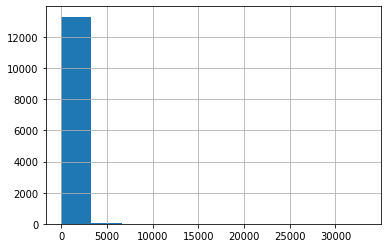

In [269]:
final_df['recovery_rate'].hist()

In [268]:
final_df.recovery_rate.value_counts()

0.0        9509
1.0         476
2.0         285
3.0         206
4.0         168
           ... 
4516.0        1
5198.0        1
367.0         1
902.0         1
26365.0       1
Name: recovery_rate, Length: 653, dtype: int64